# Chapter 20 Auto Machine Learning
# Use Case: Credit Risk - Identifying Bad Credit Risks
# ===========================================

Dataset: Credit risk https://datahub.io/machine-learning/credit-g
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

In [ ]:
# package for working with tabular data
import pandas as pd 
import numpy as np

# Package for charting
import matplotlib.pyplot as plt
import seaborn as sns #charts

# package for timing runtime
import time

# package for navigating the operating system
import os

In [ ]:
#Need to"mount" the right GoogleDrive ...
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/my drive/Colab Notebooks"

#ensure path is mounted and set correctly...
!echo $GOOGLE_APPLICATION_CREDENTIALS


Mounted at /content/drive
/content/my drive/Colab Notebooks


In [ ]:

%cd /content/drive/MyDrive/Colab Notebooks/Data
os.listdir()

/content/drive/MyDrive/Colab Notebooks/Data


['gl_master_final_X.csv', 'Finals', 'Test CSV.csv', 'credit-g.csv']

In [ ]:
loc = "credit-g.csv"
start_time = time.time()
df = pd.read_csv(loc)
print("It took %s seconds to load the .csv file." % (time.time() - start_time))

It took 0.03879117965698242 seconds to load the .csv file.


Data Wrangling ... one hot encodings, type conversion

In [ ]:
# list categorical columns...
cat_cols =['checking_status', 'purpose', 'credit_history', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans','housing','job','own_telephone']

# One hot encoding of catagorical variables...
df[cat_cols].astype("category")

# one hot encodings
one_hot_encodings = pd.get_dummies(df[cat_cols])

#Combine Dfs
df = pd.concat([df, one_hot_encodings], axis=1)

#remove categorical columns...
df = df.drop(columns=cat_cols)

#Data wrangling..... get types and bad values sorted out

# Remove characters in numeric columns (note that the data type was set, by the open_csv function, to object, 
# so we first convert to string before running the replace function (which can only be fun on str types)
df['foreign_worker'] = df['foreign_worker'].str.replace('yes', '1')
df['foreign_worker'] = df['foreign_worker'].str.replace('no', '0')
df['class'] = df['class'].str.replace('good', '0')
df['class'] = df['class'].str.replace('bad', '1')

# Convert to numerics so we can use in ML... Make sure type is good. We change the type from str to numeric here, and any 
#df['Installs'] = pd.to_numeric(df['Installs'], errors ='coerce').fillna(0).astype('int')
df['foreign_worker'] = pd.to_numeric(df['foreign_worker'], errors ='coerce').fillna(0).astype('int')
df['class'] = pd.to_numeric(df['class'], errors ='coerce').fillna(0).astype('int')
df['duration'] = pd.to_numeric(df['duration'], errors ='coerce').fillna(0).astype('int')
df['installment_commitment'] = pd.to_numeric(df['installment_commitment'], errors ='coerce').fillna(0).astype('int')
df['residence_since'] = pd.to_numeric(df['residence_since'], errors ='coerce').fillna(0).astype('int')
df['age'] = pd.to_numeric(df['age'], errors ='coerce').fillna(0).astype('int')
df['num_dependents'] = pd.to_numeric(df['num_dependents'], errors ='coerce').fillna(0).astype('int')

df

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,foreign_worker,class,checking_status_0<=X<200,...,other_payment_plans_stores,housing_for free,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_none,own_telephone_yes
0,6,1169,4,4,67,2,1,1,0,0,...,0,0,1,0,0,1,0,0,0,1
1,48,5951,2,2,22,1,1,1,1,1,...,0,0,1,0,0,1,0,0,1,0
2,12,2096,2,3,49,1,2,1,0,0,...,0,0,1,0,0,0,0,1,1,0
3,42,7882,2,4,45,1,2,1,0,0,...,0,1,0,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,1,0,0,...,0,0,1,0,0,0,0,1,1,0
996,30,3857,4,4,40,1,1,1,0,0,...,0,0,1,0,1,0,0,0,0,1
997,12,804,4,4,38,1,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0
998,45,1845,4,4,23,1,1,1,1,0,...,0,1,0,0,0,1,0,0,0,1


## Model Selection: Classification Learners

We test a number of classification learners side by side, comparing accuracy of each  

Get the sklearn packages we will need for our clasification problem

In [ ]:
import numpy as np
import time 

from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import confusion_matrix

Now build classification models to identify bad credits...

In [ ]:
# Define X and y variables
cols  = list(df.columns)
cols.remove('class')

# Contains only numerics
X = df[cols]
y = df['class']

#Test and train set    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

In [ ]:
#import SMOTE object
from imblearn.over_sampling import SMOTE
import numpy as np

def data_preprocess(X_train, y_train, X_test) -> (np.array, np.array, np.array):
  #Balance training data....
  # Generate SMOTE samples and use this to train
  upsampler_smote = SMOTE()
  X_upsampled_smote, y_upsampled_smote = upsampler_smote.fit_resample(X_train, y_train)

  sclr = StandardScaler()
  X_train = sclr.fit(X_train) # scale to 0 mean and std dev 1 on training data
  
  X_train = sclr.fit_transform(X_upsampled_smote) # scale both sets:
  X_test = sclr.fit_transform(X_test)
  
  y_train = y_upsampled_smote
  
  return X_train, y_train, X_test

#Get the data in shape
X_train, y_train, X_test = data_preprocess(X_train, y_train, X_test)

## Model selection... Choose the best F1 Score.

DecisionTreeClassifier(max_depth=5)
F1 train: 0.8433, test:  0.5277
GaussianNB()
F1 train: 0.7629, test:  0.0000
LogisticRegression(max_iter=2000, random_state=0)
F1 train: 0.8610, test:  0.5541
MLPClassifier(early_stopping=True, max_iter=2000, random_state=1)
F1 train: 0.8529, test:  0.5957
RandomForestClassifier(max_depth=3, random_state=0)
F1 train: 0.8462, test:  0.5520
LinearDiscriminantAnalysis()
F1 train: 0.8548, test:  0.5969

Winner
 <class 'sklearn.linear_model._logistic.LogisticRegression'>
Accuracy train: 0.8660, cross-validation:  0.5333
Precision train: 0.8414, cross-validation:  0.8488
Recall train: 0.9020, cross-validation:  0.3650
F1 train: 0.8610, cross-validation:  0.5541


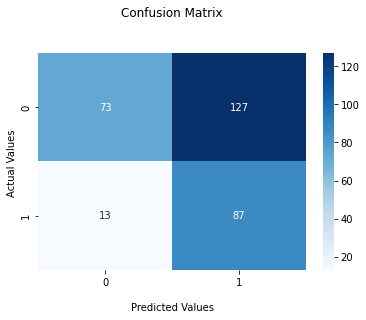

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

#Func to wrap up running these selected classification learners...
# NOTE: to test the performance of the learners out-of-sample, we are using a cross-validation dataset
# this is a hold back dataset. 
def auto_classifier_selection(X_train: pd.DataFrame, X_cross_validation: pd.DataFrame, 
                            y_train: pd.DataFrame, y_cross_validation: pd.DataFrame) -> (list, list):
    
    #Balance training data....
    # Generate SMOTE samples and use this to train
    upsampler_smote = SMOTE()
    X_upsampled_smote, y_upsampled_smote = upsampler_smote.fit_resample(X_train, y_train)

    sclr = StandardScaler()
    sclr.fit(X_train) # scale to 0 mean and std dev 1 on training data

    X_train = sclr.fit_transform(X_upsampled_smote) # scale both sets:
    X_cross_validation = sclr.fit_transform(X_cross_validation)
    
    #Run only rf? Or all?
    dtc = DecisionTreeClassifier(max_depth=5) #If we allow endless depth we overfit
    gnb = GaussianNB()
    lr = LogisticRegression(max_iter=2000,random_state=0)
    mlp = MLPClassifier(max_iter=2000,random_state=1, early_stopping=True) # MLP will tend to overfit unless we stop early   
    rf = RandomForestClassifier(max_depth=3,random_state=0)
    lda = LinearDiscriminantAnalysis()
    
    all_mdls = [dtc,gnb,lr,mlp,rf, lda]
    
    #Find the best
    max_f1 = 0
    for mdl in all_mdls:
        #Fit model
        mdl.fit(X_upsampled_smote,y_upsampled_smote)
        y_train_hat = mdl.predict(X_upsampled_smote)
        y_cross_validation_hat = mdl.predict(X_cross_validation)       
        
        # Output model selection information....
        print(mdl)
        print(f"F1 train: {f1_score(y_upsampled_smote, y_train_hat, average=None)[1]:.4f}, test: ",
        f"{f1_score(y_cross_validation,y_cross_validation_hat, average=None)[1]:.4f}")
        
        #F1...
        this_f1 = f1_score(y_upsampled_smote,y_train_hat, average=None)[1]
        if this_f1 > max_f1:
            max_f1 = this_f1
            max_mdl = mdl
        
    # The best....
    #Fit...
    max_mdl.fit(X_upsampled_smote,y_upsampled_smote)
    y_train_hat = max_mdl.predict(X_upsampled_smote)
    y_cross_validation_hat = max_mdl.predict(X_cross_validation)
    
    #    Print score
    print('\nWinner\n', type(max_mdl))        
    print(f"Accuracy train: {max_mdl.score(X_train,y_upsampled_smote):.4f}, cross-validation: ",
      f"{max_mdl.score(X_cross_validation,y_cross_validation):.4f}")
    print(f"Precision train: {precision_score(y_upsampled_smote, y_train_hat, average=None)[0]:.4f}, cross-validation: ",
      f"{precision_score(y_cross_validation,y_cross_validation_hat, average=None)[0]:.4f}")
    print(f"Recall train: {recall_score(y_upsampled_smote, y_train_hat, average=None)[0]:.4f}, cross-validation: ",
      f"{recall_score(y_cross_validation,y_cross_validation_hat, average=None)[0]:.4f}")
    print(f"F1 train: {f1_score(y_upsampled_smote, y_train_hat, average=None)[1]:.4f}, cross-validation: ",
      f"{f1_score(y_cross_validation,y_cross_validation_hat, average=None)[1]:.4f}")
        
    #Print confusion matrix...
    cf_matrix = confusion_matrix(y_cross_validation, y_cross_validation_hat, labels=[0, 1]) 
    cf_matrix_norm = cf_matrix.astype('float')

    ax = sns.heatmap(cf_matrix_norm, annot=True, cmap='Blues', fmt='g')
    ax.set_title('Confusion Matrix\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    plt.show()
    
    return max_mdl, all_mdls

#Run our function....autoselect the best classifier wrt F1
max_mdl, all_models = auto_classifier_selection(X_train, X_test, y_train, y_test)

Examine the importance of the features in our model

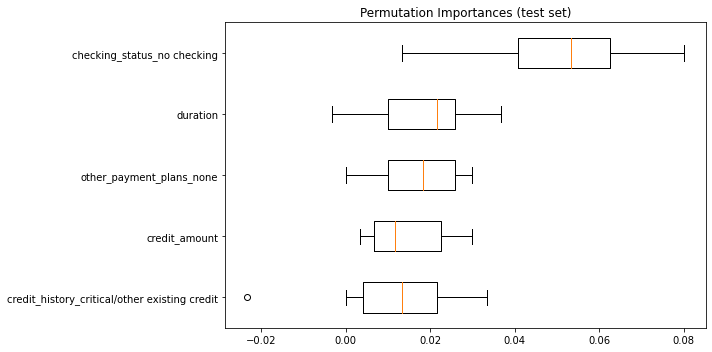

In [ ]:
from sklearn.inspection import permutation_importance

# Get the importance of each input variable
result = permutation_importance(max_mdl,
                                X_test,
                                y_test,
                                n_repeats=10,
                                random_state=42,
                                n_jobs=2)
#Get the list of ordered parameters...
sorted_idx_full = result.importances_mean.argsort()

# Top 10 parameters...
sorted_idx = sorted_idx_full[-5:]

#Chart...
fig = plt.figure(figsize=(10, 5))
ax = fig.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=X.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()

plt.show()

Only use the top 5 features and re-run...

## Install Auto-SkLearn

Some packages only work on certan operating systems (or containers).  Auto-SkLearn is an example, where it only runs on LINUX, the backend for Google Colab. It will not install on Windows.

In [ ]:
!sudo apt-get install build-essential swig
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
!pip install auto-sklearn

for _ in range(3):
    try:
        import autosklearn.classification
        break
    except:
        pass
else:
    raise ImportError("failed to import from autosklearn")

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
swig is already the newest version (3.0.12-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   259  100   259    0     0   1239      0 --:--:-- --:--:-- --:--:--  1239
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-py

Lets take a look at the pre-processing options the AUtoML may choose from...

In [ ]:
from autosklearn.pipeline.components.feature_preprocessing import FeaturePreprocessorChoice
for name in FeaturePreprocessorChoice.get_components():
    print(name)

densifier
extra_trees_preproc_for_classification
extra_trees_preproc_for_regression
fast_ica
feature_agglomeration
kernel_pca
kitchen_sinks
liblinear_svc_preprocessor
no_preprocessing
nystroem_sampler
pca
polynomial
random_trees_embedding
select_percentile_classification
select_percentile_regression
select_rates_classification
select_rates_regression
truncatedSVD


**TAKES A LONG TIME** to run the AutoML....

In [ ]:
import autosklearn.classification

#AutoML.... for classification
automl_mod = autosklearn.classification.AutoSklearnClassifier()
automl_mod.fit(X_train, y_train)
predictions = automl_mod.predict(X_test)

Show the leaderboard of the best performing pipelines: learners, preprocessors and other model specifications 

In [ ]:
automl_mod.leaderboard(detailed = True, ensemble_only=False)

,rank,ensemble_weight,type,cost,duration,config_id,train_loss,seed,start_time,end_time,budget,status,data_preprocessors,feature_preprocessors,balancing_strategy,config_origin
model_id,,,,,,,,,,,,,,,,
180,1,0.08,gradient_boosting,0.100000,3.263939,179,0.000000,0,1.661088e+09,1.661088e+09,0.0,StatusType.SUCCESS,[],[feature_agglomeration],none,Local Search
129,2,0.00,gradient_boosting,0.103030,4.389399,128,0.000000,0,1.661088e+09,1.661088e+09,0.0,StatusType.SUCCESS,[],[feature_agglomeration],none,Local Search
13,3,0.02,gradient_boosting,0.103030,4.471590,12,0.000000,0,1.661086e+09,1.661086e+09,0.0,StatusType.SUCCESS,[],[feature_agglomeration],weighting,Initial design
141,4,0.02,gradient_boosting,0.106061,4.563909,140,0.000000,0,1.661088e+09,1.661088e+09,0.0,StatusType.SUCCESS,[],[feature_agglomeration],weighting,Local Search
115,5,0.00,gradient_boosting,0.106061,3.832340,114,0.000000,0,1.661087e+09,1.661087e+09,0.0,StatusType.SUCCESS,[],[feature_agglomeration],none,Local Search
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,180,0.00,passive_aggressive,0.500000,1.071230,177,0.500000,0,1.661088e+09,1.661088e+09,0.0,StatusType.SUCCESS,[],[no_preprocessing],none,Random Search
111,181,0.00,libsvm_svc,0.500000,1.921704,110,0.500000,0,1.661087e+09,1.661087e+09,0.0,StatusType.SUCCESS,[],[random_trees_embedding],weighting,Random Search
109,182,0.00,qda,0.539394,1.906888,108,0.661194,0,1.661087e+09,1.661087e+09,0.0,StatusType.SUCCESS,[],[kernel_pca],weighting,Random Search


Get training data

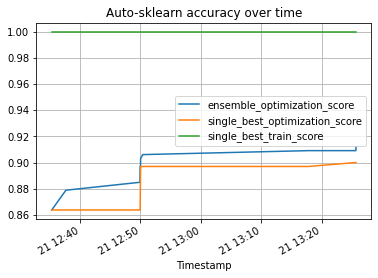

In [ ]:
#Examine the training process of the AutoML
automl_mod.performance_over_time_.plot(
        x='Timestamp',
        kind='line',
        legend=True,
        title='Auto-sklearn accuracy over time',
        grid=True,
    )

Now examine the pipeline in detail

In [ ]:
import PipelineProfiler 

# Get an interactive screen, which we can view the pre-processing, model selection, balancing schemes chosen by the AutoML 
profiler_data= PipelineProfiler.import_autosklearn(automl_mod) 
PipelineProfiler.plot_pipeline_matrix(profiler_data) 

Output hidden; open in https://colab.research.google.com to view.

Now lets look at the results..... of the best pipeline the AutoML has found

In [ ]:
y_train_hat = automl_mod.predict(X_train)
y_test_hat = automl_mod.predict(X_test)

How does it compare to the classifiers we jave previously run?

AutoSklearnClassifier(per_run_time_limit=360)
F1 train: 0.9685, test:  0.4654


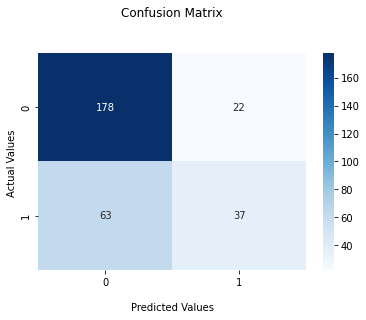

In [ ]:
#Confuision matrix for the AutoML model
cf_matrix = confusion_matrix(y_test, y_test_hat, labels=[0, 1]) 
cf_matrix_norm = cf_matrix.astype('float') # / cf_matrix.sum(axis=1)[:, np.newaxis]

# Output model selection information....
print(automl_mod)
print(f"F1 train: {f1_score(y_train, y_train_hat, average=None)[1]:.4f}, test: ",
f"{f1_score(y_test,y_test_hat, average=None)[1]:.4f}")

ax = sns.heatmap(cf_matrix_norm, annot=True, cmap='Blues', fmt='g')
ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()